# Setup

In [1]:
%%capture
%pip install git+https://github.com/neelnanda-io/TransformerLens.git
!pip install faker

In [2]:
#NOTE::This should print out the environment you are currently using!
import sys
print(sys.executable)

/home/ubuntu/new_venv/bin/python


In [3]:
import torch
from typing import Optional
import copy

import pickle
import matplotlib.pyplot as plt

In [4]:
import transformer_lens.utils as utils  # for test prompts
from transformer_lens import HookedTransformer
torch.set_grad_enabled(False)

/home/ubuntu/new_venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Model

In [5]:
model = HookedTransformer.from_pretrained(
    # "gpt2-small",
    # "gpt2-large",
    "gpt2-medium",
    center_unembed=True,
    center_writing_weights=True,
    fold_ln=True,
    refactor_factored_attn_matrices=True,
)

Loaded pretrained model gpt2-medium into HookedTransformer


## Import functions from repo

In [6]:
# !git clone https://github.com/apartresearch/seqcont_circuits.git
#TODO::replace with your path
# %cd ../../src/generate_data
sys.path.append("../../src/generate_data")

In [63]:
from importlib import reload
import generate_data
reload(generate_data)
# from generate_data import *

<module 'generate_data' from '/home/ubuntu/seqcont_circuits/notebooks/gpt2_expms/../../src/generate_data/generate_data.py'>

# names

In [126]:
sequence_name = "numerals_step_2"
# sequence_name = "numerals_step_3" # TODO::replace with the name of the dictionary you create in generate_data.py
# sequence_name = "numerals_times_2" # works for GPT2_medium but few good prompts
# sequence_name = "numerals_alternate" # works for GPT2_medium
# sequence_name = "decimal_descend" # didn't work for GPT2-medium or -large
# sequence_name = "fibonacci" # didn't work for GPT2-medium
# sequence_name = "alternating_sign" # didn't work for GPT2-medium or -large
# sequence_name = "descending_num" # works for GPT2_medium
# sequence_name = "descending_num_words"

In [127]:
# file_name = '/jet/home/mjain4/Project/seqcont_circuits/data/numwords/numwords_prompts_names.pkl' #TODO::replace with correct path
file_name = '../../data/numwords/numwords_prompts_names.pkl' 
with open(file_name, 'rb') as file:
    prompts_list = pickle.load(file)

In [128]:
prompts_list = generate_data.replace_nw_seqtype(prompts_list, sequence_name)

In [129]:
print(prompts_list)
print(len(prompts_list))

[{'S1': '2', 'S2': '4', 'S3': '6', 'S4': '8', 'corr': ' 10', 'incorr': ' 8', 'text': 'Marcus born in 2. Victoria born in 4. George born in 6. Brandon born in 8. Jamie born in'}, {'S1': '4', 'S2': '6', 'S3': '8', 'S4': '10', 'corr': ' 12', 'incorr': ' 10', 'text': 'Mike born in 4. Jay born in 6. Arthur born in 8. Victoria born in 10. Eric born in'}, {'S1': '6', 'S2': '8', 'S3': '10', 'S4': '12', 'corr': ' 14', 'incorr': ' 12', 'text': 'Andre born in 6. Jack born in 8. Jose born in 10. Stephen born in 12. Allen born in'}, {'S1': '8', 'S2': '10', 'S3': '12', 'S4': '14', 'corr': ' 16', 'incorr': ' 14', 'text': 'Gene born in 8. Jamie born in 10. Tyler born in 12. Marc born in 14. Jessica born in'}, {'S1': '10', 'S2': '12', 'S3': '14', 'S4': '16', 'corr': ' 18', 'incorr': ' 16', 'text': 'Henry born in 10. Danny born in 12. Jon born in 14. Charles born in 16. Keith born in'}, {'S1': '12', 'S2': '14', 'S3': '16', 'S4': '18', 'corr': ' 20', 'incorr': ' 18', 'text': 'Donald born in 12. Connor bo

In [130]:
# good_prompts, all_probs = generate_data.get_good_prompts_numerals(model, prompts_list[:1])
good_prompts, all_probs = generate_data.get_good_prompts_numerals(model, prompts_list)

print(len(good_prompts))

answer=

 10

incor=

 8

toks = 

[' 10', ' 9', ' 11', ' 12', ' 13', ' 8', ' 14', ' 16', ' 15', ' 1']

incor_ind =

5

probs = 

tensor([0.3115, 0.2895, 0.1144, 0.0768, 0.0426, 0.0260, 0.0200, 0.0160, 0.0128,
        0.0098], device='cuda:0')
answer=

 12

incor=

 10

toks = 

[' 12', ' 11', ' 13', ' 14', ' 15', ' 16', ' 10', ' 17', ' 20', ' 4']

incor_ind =

6

probs = 

tensor([0.3941, 0.2072, 0.1486, 0.0720, 0.0431, 0.0209, 0.0126, 0.0085, 0.0080,
        0.0065], device='cuda:0')
answer=

 14

incor=

 12

toks = 

[' 14', ' 13', ' 15', ' 16', ' 12', ' 18', ' 17', ' 20', ' 19', ' 1']

incor_ind =

4

probs = 

tensor([0.4708, 0.3108, 0.0861, 0.0368, 0.0202, 0.0095, 0.0089, 0.0083, 0.0058,
        0.0045], device='cuda:0')
answer=

 16

incor=

 14

toks = 

[' 15', ' 16', ' 17', ' 14', ' 20', ' 18', ' 25', ' 10', ' 30', ' 5']

incor_ind =

3

probs = 

tensor([0.8146, 0.1150, 0.0130, 0.0110, 0.0093, 0.0057, 0.0021, 0.0017, 0.0017,
        0.0014], device='cuda:0')
answer=

 18

i

In [12]:
%pwd

'/home/ubuntu/seqcont_circuits/notebooks/gpt2_expms'

In [131]:
# #TODO::replace with correct path
# # with open(f'../../data/{sequence_name}/{sequence_name}_prompts_names.pkl', 'wb') as file:
# with open("/home/ubuntu/seqcont_circuits/data/numerals_alternate/numerals_alternate_prompts_names.pkl", 'wb') as file:
#     pickle.dump(good_prompts, file)
import os

output_path = f"../../data/{sequence_name}"
os.makedirs(output_path, exist_ok=True)

with open(f"{output_path}/{sequence_name}_prompts_names.pkl", 'wb') as file:
    pickle.dump(good_prompts, file)


Text(0.5, 1.0, 'Distribution')

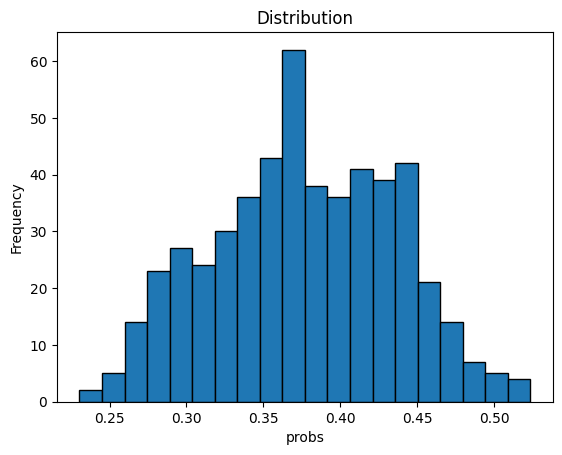

In [132]:
plt.hist([probs[0].item() for probs in all_probs], bins = 20, edgecolor='black')
plt.xlabel('probs')
plt.ylabel('Frequency')
plt.title('Distribution')

# lost

In [133]:
file_name = '../../data/numwords/numwords_prompts_lost.pkl'  #TODO::replace with your path
with open(file_name, 'rb') as file:
    prompts_list = pickle.load(file)

In [134]:
prompts_list = generate_data.replace_nw_seqtype(prompts_list, sequence_name)

In [135]:
good_prompts, all_probs = generate_data.get_good_prompts_numerals(model, prompts_list)

answer=

 10

incor=

 8

toks = 

[' 10', ' 9', ' 12', ' 11', ' 16', ' 13', ' 14', ' 8', ' 2', ' 15']

incor_ind =

7

probs = 

tensor([0.3832, 0.1197, 0.1127, 0.0897, 0.0460, 0.0417, 0.0258, 0.0193, 0.0149,
        0.0141], device='cuda:0')
answer=

 12

incor=

 10

toks = 

[' 12', ' 13', ' 11', ' 14', ' 15', ' 16', ' 10', ' 20', ' 4', ' 8']

incor_ind =

6

probs = 

tensor([0.4245, 0.1309, 0.1258, 0.0941, 0.0550, 0.0266, 0.0189, 0.0113, 0.0101,
        0.0087], device='cuda:0')
answer=

 14

incor=

 12

toks = 

[' 14', ' 13', ' 15', ' 16', ' 12', ' 20', ' 17', ' 18', ' 19', ' 1']

incor_ind =

4

probs = 

tensor([0.4626, 0.2804, 0.0841, 0.0492, 0.0276, 0.0125, 0.0088, 0.0083, 0.0066,
        0.0045], device='cuda:0')
answer=

 16

incor=

 14

toks = 

[' 15', ' 16', ' 17', ' 20', ' 18', ' 14', ' 21', ' 22', ' 19', ' 25']

incor_ind =

5

probs = 

tensor([0.4839, 0.3241, 0.0451, 0.0389, 0.0336, 0.0118, 0.0098, 0.0044, 0.0044,
        0.0039], device='cuda:0')
answer=

 18

i

In [136]:
print(len(good_prompts))

799


In [137]:
#TODO::replace with correct path
with open(f'../../data/{sequence_name}/{sequence_name}_prompts_lost.pkl', 'wb') as file:
    pickle.dump(good_prompts, file)

Text(0.5, 1.0, 'Distribution')

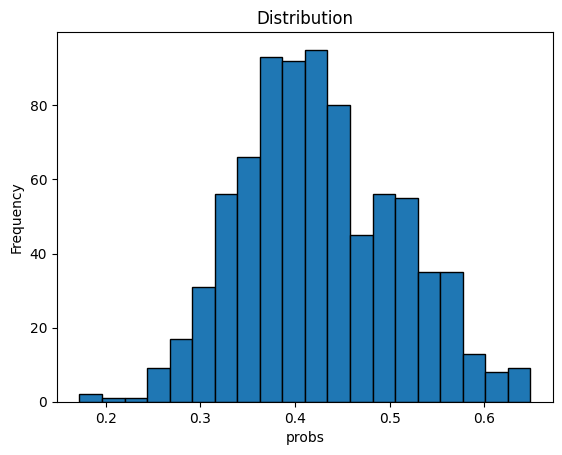

In [138]:
plt.hist([probs[0].item() for probs in all_probs], bins = 20, edgecolor='black')
plt.xlabel('probs')
plt.ylabel('Frequency')
plt.title('Distribution')

# done

In [139]:
file_name = '../../data/numwords/numwords_prompts_done.pkl' #TODO::replace with correct path
with open(file_name, 'rb') as file:
    prompts_list = pickle.load(file)

In [140]:
prompts_list = generate_data.replace_nw_seqtype(prompts_list, sequence_name)

In [141]:
good_prompts, all_probs = generate_data.get_good_prompts_numerals(model, prompts_list)

answer=

 10

incor=

 8

toks = 

[' 10', ' 9', ' 12', ' 2', ' 11', ' 1', ' 4', ' 3', ' 6', ' 8']

incor_ind =

9

probs = 

tensor([0.2842, 0.1114, 0.0913, 0.0760, 0.0597, 0.0476, 0.0416, 0.0304, 0.0282,
        0.0278], device='cuda:0')
answer=

 12

incor=

 10

toks = 

[' 12', ' 11', ' 13', ' 14', ' 15', ' 10', ' 16', ' 4', ' 6', ' 20']

incor_ind =

5

probs = 

tensor([0.5282, 0.1616, 0.0676, 0.0425, 0.0344, 0.0166, 0.0118, 0.0114, 0.0110,
        0.0096], device='cuda:0')
answer=

 14

incor=

 12

toks = 

[' 14', ' 13', ' 15', ' 16', ' 12', ' 20', ' 17', ' 7', ' 18', ' 6']

incor_ind =

4

probs = 

tensor([0.6265, 0.1976, 0.0794, 0.0367, 0.0087, 0.0054, 0.0048, 0.0043, 0.0043,
        0.0035], device='cuda:0')
answer=

 16

incor=

 14

toks = 

[' 15', ' 16', ' 17', ' 18', ' 20', ' 14', ' 8', ' 10', ' 5', ' 12']

incor_ind =

5

probs = 

tensor([0.4940, 0.3093, 0.0376, 0.0252, 0.0190, 0.0181, 0.0112, 0.0074, 0.0070,
        0.0063], device='cuda:0')
answer=

 18

incor=



In [157]:
print(len(good_prompts))
print(good_prompts)

611
[{'S1': '2', 'S2': '4', 'S3': '6', 'S4': '8', 'corr': ' 10', 'incorr': ' 8', 'text': 'Van done in 2. Hat done in 4. Ring done in 6. Desk done in 8. Sun done in'}, {'S1': '4', 'S2': '6', 'S3': '8', 'S4': '10', 'corr': ' 12', 'incorr': ' 10', 'text': 'Ice done in 4. Snow done in 6. Watch done in 8. Sun done in 10. Table done in'}, {'S1': '6', 'S2': '8', 'S3': '10', 'S4': '12', 'corr': ' 14', 'incorr': ' 12', 'text': 'Ring done in 6. Moon done in 8. Queen done in 10. Book done in 12. Rose done in'}, {'S1': '10', 'S2': '12', 'S3': '14', 'S4': '16', 'corr': ' 18', 'incorr': ' 16', 'text': 'Light done in 10. Arm done in 12. Road done in 14. Book done in 16. Ice done in'}, {'S1': '12', 'S2': '14', 'S3': '16', 'S4': '18', 'corr': ' 20', 'incorr': ' 18', 'text': 'Ball done in 12. Cow done in 14. Book done in 16. Rose done in 18. Key done in'}, {'S1': '14', 'S2': '16', 'S3': '18', 'S4': '20', 'corr': ' 22', 'incorr': ' 20', 'text': 'Road done in 14. Key done in 16. Ocean done in 18. Key done

In [154]:
# only run if the text doesn't have "___ done in ___". I ran into the issue where the text was instead "___ d2 in ___"
for prompt in good_prompts:
    text = prompt['text']
    corrected_text = text.replace("d2", "done")
    prompt['text'] = corrected_text

In [158]:
#TODO::replace with correct path
with open(f'../../data/{sequence_name}/{sequence_name}_prompts_done.pkl', 'wb') as file:
    pickle.dump(good_prompts, file)

Text(0.5, 1.0, 'Distribution')

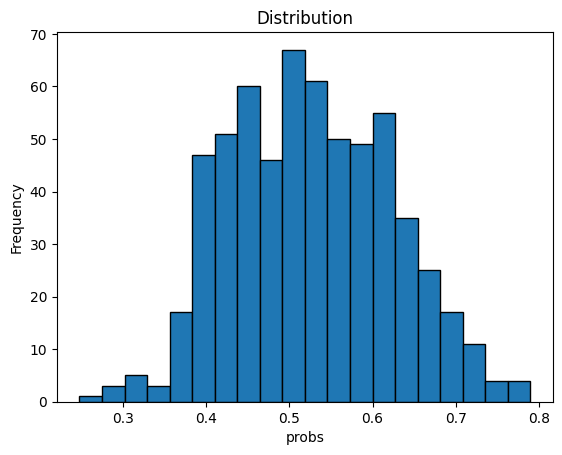

In [159]:
plt.hist([probs[0].item() for probs in all_probs], bins = 20, edgecolor='black')
plt.xlabel('probs')
plt.ylabel('Frequency')
plt.title('Distribution')

In [160]:
#TODO::replace with correct path for all 3
file_name = f'../../data/{sequence_name}/{sequence_name}_prompts_done.pkl'
with open(file_name, 'rb') as file:
    prompts_list_done = pickle.load(file)
    
file_name = f'../../data/{sequence_name}/{sequence_name}_prompts_lost.pkl'
with open(file_name, 'rb') as file:
    prompts_list_lost = pickle.load(file)
    
file_name = f'../../data/{sequence_name}/{sequence_name}_prompts_names.pkl'
with open(file_name, 'rb') as file:
    prompts_list_names = pickle.load(file)

In [161]:
# Truncate prompt lists to match size of smallest prompt list
min_len = min(len(prompts_list_done), len(prompts_list_lost), len(prompts_list_names))
prompts_list_done = prompts_list_done[:min_len]
prompts_list_lost = prompts_list_lost[:min_len]
prompts_list_names = prompts_list_names[:min_len]

In [162]:
output_done = generate_data.generate_prompts_list_corr(prompts_list_done)
output_lost = generate_data.generate_prompts_list_corr(prompts_list_lost)
output_names = generate_data.generate_prompts_list_corr(prompts_list_names)

In [163]:
output = []
output.extend(output_done)
output.extend(output_lost)
output.extend(output_names)

In [164]:
# save random prompts
with open(f'../../data/{sequence_name}/randDS_{sequence_name}.pkl', 'wb') as file:
    pickle.dump(output, file)

In [165]:
# resave names, done, and list prompts using the truncated lists
with open(f'../../data/{sequence_name}/{sequence_name}_prompts_done.pkl', 'wb') as file:
    pickle.dump(prompts_list_done, file)
with open(f'../../data/{sequence_name}/{sequence_name}_prompts_lost.pkl', 'wb') as file:
    pickle.dump(prompts_list_lost, file)
with open(f'../../data/{sequence_name}/{sequence_name}_prompts_names.pkl', 'wb') as file:
    pickle.dump(prompts_list_names, file)

In [166]:
print(len(prompts_list_done))

print(len(prompts_list_lost))

print(len(prompts_list_names))



513
513
513


In [168]:
print(output)

[{'S1': '7', 'S2': '12', 'S3': '7', 'S4': '1', 'corr': ' 10', 'incorr': ' 8', 'text': 'Van done in 7. Hat done in 12. Ring done in 7. Desk done in 1. Sun done in'}, {'S1': '8', 'S2': '8', 'S3': '6', 'S4': '8', 'corr': ' 12', 'incorr': ' 10', 'text': 'Ice done in 8. Snow done in 8. Watch done in 6. Sun done in 8. Table done in'}, {'S1': '1', 'S2': '3', 'S3': '10', 'S4': '5', 'corr': ' 14', 'incorr': ' 12', 'text': 'Ring done in 1. Moon done in 3. Queen done in 10. Book done in 5. Rose done in'}, {'S1': '9', 'S2': '2', 'S3': '3', 'S4': '10', 'corr': ' 18', 'incorr': ' 16', 'text': 'Light done in 9. Arm done in 2. Road done in 3. Book done in 10. Ice done in'}, {'S1': '12', 'S2': '12', 'S3': '2', 'S4': '9', 'corr': ' 20', 'incorr': ' 18', 'text': 'Ball done in 12. Cow done in 12. Book done in 2. Rose done in 9. Key done in'}, {'S1': '6', 'S2': '3', 'S3': '12', 'S4': '11', 'corr': ' 22', 'incorr': ' 20', 'text': 'Road done in 6. Key done in 3. Ocean done in 12. Key done in 11. Queen done i